# Tutorial for offline data analysis of face vs scene stimuli
---
The analyis_functions.py file contains all the necessary functions to load in and preprocess the data.


In [1]:
from analysis_functions import *

import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score, LeaveOneGroupOut, cross_val_predict
from scipy import stats

import seaborn as sns

### Classification during visual observation periods
The load_obs_data function can be used to load in all the data from the observation periods. This function requires a path to where the data is stored, the name of the subject folder containing the data, and the session number. You can also pass an array of the channels you would like to include in the analysis and the channels you would like to rereference to. The argument 'preprocess' can be set to False if you would like to return only the raw data. Otherwise, the data will be rereferenced, filtered, and standardized. 

In [2]:
file_path = '../Data/'
target_subject = 'justin_nk'
target_session = 4

obs_channel = np.array([16, 17, 18]) - 1
#obs_channel = np.arange(32)
#obs_channel = np.array([13, 14, 15, 16, 17, 18, 19, 20]) - 1
#obs_channel = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
obs_ref_channel = np.array([10, 21]) - 1

trials, labels = load_obs_data(file_path, target_subject, target_session, obs_channel, obs_ref_channel, preprocess=True)

Mean accuracy:  0.5458333333333334


Text(0.5, 1.0, 'Visual Observation')

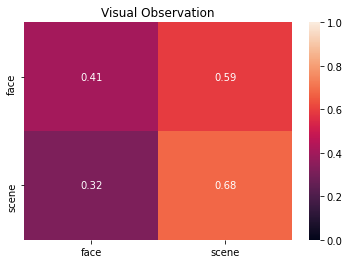

In [3]:
window = int(1.75 * 500)
step = int(window/2)
mult = 3
#window = int(3.75 * 500)
#step = window
#mult = 1
low = 1
high = 40

segments = segment_trials(trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([labels]*mult)
trial_labels = np.hstack([np.ones(20), np.ones(20)*2, np.ones(20)*3, np.ones(20)*4]*mult)

clf = SVC(kernel='linear')
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
cv = LeaveOneGroupOut()

cv_score = cross_val_score(clf, features, labels, cv=cv, groups=trial_labels)
cv_pred = cross_val_predict(clf, features, labels, cv=cv, groups=trial_labels)

print('Mean accuracy: ', np.mean(cv_score))

cm = confusion_matrix(labels, cv_pred, normalize='true')
f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['face', 'scene'], yticklabels=['face', 'scene'])
plt.title('Visual Observation')

### Classification during visual imagery periods
The load_img_data function can similarly be used to load in all the data from the imagery periods. This function works the same as the load_obs_data function. 

In [4]:
file_path = '../Data/'
target_subject = 'justin_nk'
target_session = 4

#img_channel = np.array([16, 17, 18]) - 1
#img_channel = np.arange(32)
#img_channel = np.array([13, 14, 15, 16, 17, 18, 19, 20]) - 1
img_channel = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
img_ref_channel = np.array([10, 21]) - 1

trials, labels = load_img_data(file_path, target_subject, target_session, img_channel, img_ref_channel, preprocess=True)

Mean accuracy:  0.6416666666666667


Text(0.5, 1.0, 'Visual Imagery')

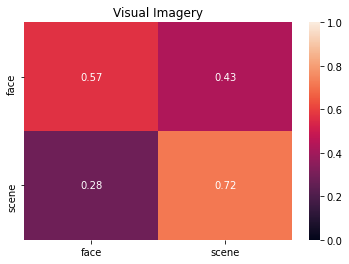

In [5]:
window = int(1.75 * 500)
step = int(window/2)
mult = 3
#window = int(3.75 * 500)
#step = window
#mult = 1
low = 1
high = 125

segments = segment_trials(trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([labels]*mult)
trial_labels = np.hstack([np.ones(20), np.ones(20)*2, np.ones(20)*3, np.ones(20)*4]*mult)

clf = SVC(kernel='linear')
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
cv = LeaveOneGroupOut()

cv_score = cross_val_score(clf, features, labels, cv=cv, groups=trial_labels)
cv_pred = cross_val_predict(clf, features, labels, cv=cv, groups=trial_labels)

print('Mean accuracy: ', np.mean(cv_score))

cm = confusion_matrix(labels, cv_pred, normalize='true')
f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['face', 'scene'], yticklabels=['face', 'scene'])
plt.title('Visual Imagery')

### Classification rest vs task
The load_rest_obs_data and load_rest_img_data functions can be used to load in all the data from the rest and observation/imagery periods. To combine the face and scene tasks under a single lable, the labels must be overwritten as shown below. Otherwise, the labels can be left as is for a 3-way classification.

In [6]:
file_path = '../Data/'
target_subject = 'justin_nk'
target_session = 4

#img_channel = np.array([16, 17, 18]) - 1
#img_channel = np.arange(32)
#img_channel = np.array([13, 14, 15, 16, 17, 18, 19, 20]) - 1
img_channel = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
img_ref_channel = np.array([10, 21]) - 1

trials, labels = load_rest_img_data(file_path, target_subject, target_session, img_channel, img_ref_channel, preprocess=True)
labels = np.hstack([[200]*10, [100]*10]*8)

Mean accuracy:  0.5875000000000001


Text(0.5, 1.0, 'Imagery vs Rest')

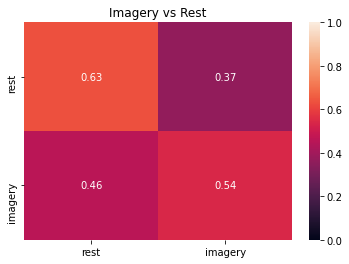

In [7]:
window = int(1.75 * 500)
step = int(window/2)
mult = 3
#window = int(3.75 * 500)
#step = window
#mult = 1
low = 1
high = 125


segments = segment_trials(trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([labels]*mult)
trial_labels = np.hstack([np.ones(40), np.ones(40)*2, np.ones(40)*3, np.ones(40)*4]*mult)

clf = SVC(kernel='linear')
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
cv = LeaveOneGroupOut()

cv_score = cross_val_score(clf, features, labels, cv=cv, groups=trial_labels)
cv_pred = cross_val_predict(clf, features, labels, cv=cv, groups=trial_labels)

print('Mean accuracy: ', np.mean(cv_score))

cm = confusion_matrix(labels, cv_pred, normalize='true')
f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['rest', 'imagery'], yticklabels=['rest', 'imagery'])
plt.title('Imagery vs Rest')

In [8]:
file_path = '../Data/'
target_subject = 'justin_nk'
target_session = 4

#img_channel = np.array([16, 17, 18]) - 1
#img_channel = np.arange(32)
#img_channel = np.array([13, 14, 15, 16, 17, 18, 19, 20]) - 1
img_channel = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
img_ref_channel = np.array([10, 21]) - 1

trials, labels = load_rest_img_data(file_path, target_subject, target_session, img_channel, img_ref_channel, preprocess=True)

Mean accuracy:  0.5354166666666667
Mean balanced accuracy:  0.46666666666666673


Text(0.5, 1.0, 'Rest vs Face vs Scene')

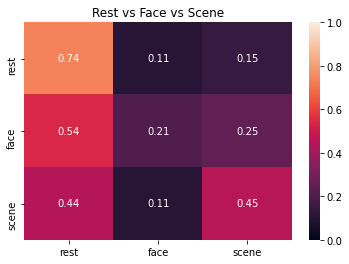

In [9]:
window = int(1.75 * 500)
step = int(window/2)
mult = 3
#window = int(3.75 * 500)
#step = window
#mult = 1
low = 1
high = 125


segments = segment_trials(trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([labels]*mult)
trial_labels = np.hstack([np.ones(40), np.ones(40)*2, np.ones(40)*3, np.ones(40)*4]*mult)

clf = SVC(kernel='linear')
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
cv = LeaveOneGroupOut()

cv_score = cross_val_score(clf, features, labels, cv=cv, groups=trial_labels)
cv_pred = cross_val_predict(clf, features, labels, cv=cv, groups=trial_labels)

print('Mean accuracy: ', np.mean(cv_score))
print('Mean balanced accuracy: ', balanced_accuracy_score(labels, cv_pred))

cm = confusion_matrix(labels, cv_pred, normalize='true')
f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['rest', 'face', 'scene'], yticklabels=['rest', 'face', 'scene'])
plt.title('Rest vs Face vs Scene')

### Multiple session classification
You can also concatenate data from multiple sessions together if you want to test across-session classification. The example below tests classification for rest vs face vs scene between 3 sessions using a leave-one-session-out cross-validation

Mean accuracy:  0.55625
Mean balanced accuracy:  0.5023148148148148


Text(0.5, 1.0, 'Multiple Sessions')

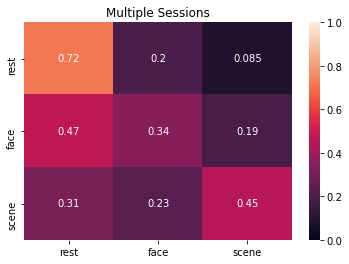

In [10]:
file_path = '../Data/'
target_subject = 'justin_nk'
target_sessions = [4,5,6]
channels = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
ref_channels = np.array([10, 21]) - 1

first_flag = True
for session in target_sessions:
    tmp_trials, tmp_labels = load_rest_img_data(file_path, target_subject, session, channels, ref_channels, preprocess=True)
    
    if first_flag:
        trials = tmp_trials
        labels = tmp_labels
        first_flag = False
    else:
        trials = np.concatenate((trials, tmp_trials), axis=0)
        labels = np.concatenate((labels, tmp_labels), axis=0)
        
window = int(1.75 * 500)
step = int(window/2)
mult = 3
#window = int(3.75 * 500)
#step = window
#mult = 1
low = 1
high = 125

segments = segment_trials(trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([labels]*mult)
trial_labels = np.hstack([np.ones(160), np.ones(160)*2, np.ones(160)*3]*mult)

clf = SVC(kernel='linear')
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
cv = LeaveOneGroupOut()

cv_score = cross_val_score(clf, features, labels, cv=cv, groups=trial_labels)
cv_pred = cross_val_predict(clf, features, labels, cv=cv, groups=trial_labels)

print('Mean accuracy: ', np.mean(cv_score))
print('Mean balanced accuracy: ', balanced_accuracy_score(labels, cv_pred))

cm = confusion_matrix(labels, cv_pred, normalize='true')
f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['rest', 'face', 'scene'], yticklabels=['rest', 'face', 'scene'])
plt.title('Multiple Sessions')

### Real-time analysis
The function load_real_time_data can be used to load in the data from the imagery periods, the correct labels, and the the classifier predictions during the real-time BCI runs. When using this, note that the labels for the rest period are different than before. It is important to switch them before analysis. This should be cleaned up in the future to eliminate confusion.

Below, we are first plotting the classification accuracy that the real-time BCI achieved during the session. Next, we can simulate the real-time BCI in order to try out some different analysis techniques (such as different number of training runs, different channels, etc.)

Mean accuracy:  0.4722222222222222


Text(0.5, 1.0, 'Real-Time BCI')

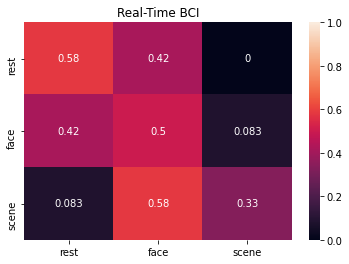

In [11]:
file_path = '../Data/'
current_subject = 'justin_rt'
current_session = 5
channels = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
#channels = np.arange(32)
ref_channels = np.array([10, 21]) - 1

trials, labels, preds= load_real_time_data(file_path, current_subject, current_session, channels, ref_channels, preprocess=False)
labels = np.where(labels==330, 100, labels)
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

print('Mean accuracy: ', accuracy_score(labels, preds))

cm = confusion_matrix(labels, preds, normalize='true')

f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['rest', 'face', 'scene'], yticklabels=['rest', 'face', 'scene'])
plt.title('Real-Time BCI')

In [12]:
file_path = '../Data/'
target_subject = 'justin_nk'
current_subject = 'justin_rt'
current_session = 5
channels = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1
#channels = np.arange(32)
ref_channels = np.array([10, 21]) - 1

first_flag = True
target_sessions = [4,5,6]
for session in target_sessions:
    trials, labels = load_rest_img_data(file_path, target_subject, session, channels, ref_channels, preprocess=True)
    
    if first_flag:
        img_trials = trials
        img_labels = labels
        first_flag = False
    else:
        img_trials = np.concatenate((img_trials, trials), axis=0)
        img_labels = np.concatenate((img_labels, labels), axis=0)

trials, labels = load_rest_img_data(file_path, current_subject, current_session, channels, ref_channels, preprocess=True, tune=True)
img_trials = np.concatenate((img_trials, trials), axis=0)
img_labels = np.concatenate((img_labels, labels), axis=0)

window = int(1.75 * 500)
step = int(window/2)
mult = 3
low = 1
high = 100

segments = segment_trials(img_trials, window, step)
features = create_features(segments, low, high)
labels = np.hstack([img_labels]*mult)
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

clf = SVC(kernel='linear')
clf.fit(features, labels)

SVC(kernel='linear')

Mean accuracy:  0.4722222222222222


Text(0.5, 1.0, 'Simulated Real-Time BCI')

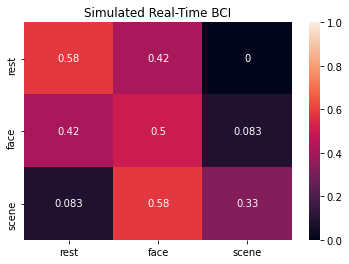

In [13]:
file_path = '../Data/'
current_subject = 'justin_rt'
current_session = 5
channels = np.arange(32)
ref_channels = np.array([10, 21]) - 1

test_trials, test_labels, test_preds= load_real_time_data(file_path, current_subject, current_session, channels, ref_channels, preprocess=False)

fs = 500
img_band = [1, 125]
add_delay = int(0.6 * fs)
n_time = int(3.5 * fs)
channels = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]) - 1

preds = []
for i in range(len(test_trials)):
    buffer = test_trials[i]
    img_raw = np.expand_dims(buffer, 0)
    img_trials = img_raw[:, channels, :]
    img_ref = img_raw[:, ref_channels, :]

    img_trials = rereference(img_trials, img_ref, channel_axis = 1)
    img_notched = notchFilter(img_trials, 60, fs)
    img_notched = notchFilter(img_notched, 120, fs)
    img_trials, n_discard = bandpass(img_notched, img_band, fs, 2, add_delay)
    img_trials = img_trials[:, :, n_discard:n_discard + n_time]
    img_trials = standardize(img_trials)

    window = int(1.75 * 500)
    step = int(window/2)
    low = 1
    high = 100

    segments = segment_trials(img_trials, window, step)
    features = create_features(segments, low, high)

    y_pred = clf.predict(features)

    preds.append(y_pred[1])
    
test_labels = np.where(test_labels==330, 100, test_labels)
le = preprocessing.LabelEncoder()
labels = le.fit_transform(test_labels)

print('Mean accuracy: ', accuracy_score(labels, preds))

cm = confusion_matrix(labels, preds, normalize='true')

f = sns.heatmap(cm, annot=True, vmin=0, vmax=1.0, xticklabels=['rest', 'face', 'scene'], yticklabels=['rest', 'face', 'scene'])
plt.title('Simulated Real-Time BCI')
